In [3]:
import os
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import soundfile as sf
import random
import torch
import librosa

import utils.irutilities as irutil

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [9]:
file_name = 'nuvole.mp3'

folder_name = os.path.splitext(file_name)[0]
dataset_path = 'dataset'

# Check if the folder exists
folder_path = os.path.join(dataset_path, folder_name)
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Created folder: {folder_path}")
else:
    is_empty = len(os.listdir(folder_path)) == 0
    if is_empty:
        print(f"Folder '{folder_path}' is empty.")
    else:
        print(f"Folder '{folder_path}' is not empty.")
        
raw_data_path = Path('raw_data/mesh_rir/')

inputPath = raw_data_path.joinpath('S32-M441_npy')

posMic, posSrc, ir = irutil.loadIR(inputPath)
samplerate = 48000

print('mics: ', posMic.shape)
print('sources :', posSrc.shape)

Folder 'dataset/nuvole' is not empty.
mics:  (441, 3)
sources : (32, 3)


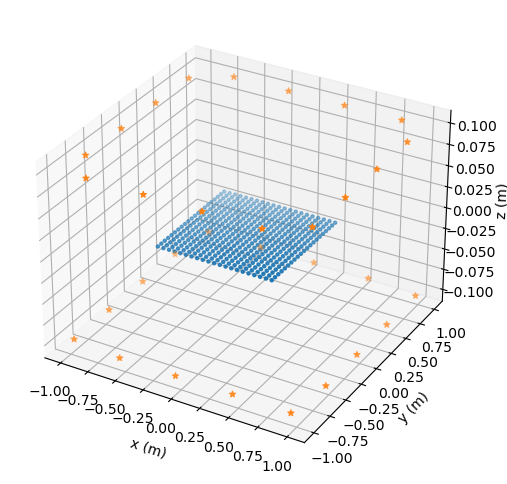

In [9]:
irutil.drawGeometry(posSrc, posMic)

In [3]:
# select some mics out of 441
# select some sources out of 32

mics = random.sample(range(441), 30)
sources = random.sample(range(32), 15)

mics_sub = posMic[mics]
sources_sub = posSrc[sources]

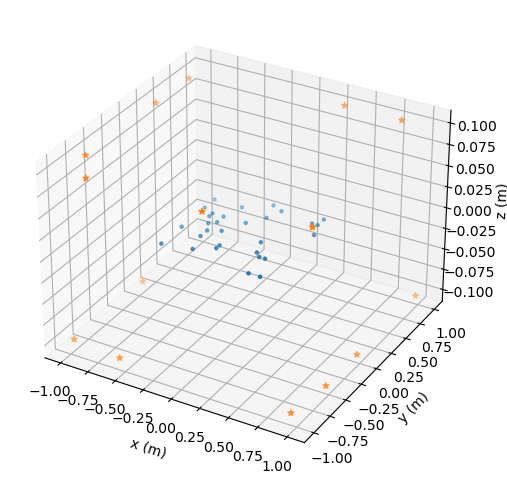

In [4]:
# Plot geometry
irutil.drawGeometry(sources_sub, mics_sub)

In [5]:
dry_audio_file = 'raw_data/nuvole_bianche.mp3'
dry_audio, sr = sf.read(dry_audio_file)

dry_audio = dry_audio[int(sr*60):int(sr*90)]

In [6]:
# irutil.irPlots(ir[srcIdx, micIdx, :], samplerate)

for i in sources:
    for j in mics:

        ir_sel = ir[i, j, :] 
        convolved = np.zeros_like(dry_audio)
        for ch in range(dry_audio.shape[1]):
            convolved[:, ch] = np.convolve(dry_audio[:,ch], ir_sel, mode='same')
        convolved /= np.max(np.abs(convolved))

        output_file = os.path.join(outputPath, f'nuvole_{i}_{j}.wav')
        sf.write(output_file, convolved, sr)

KeyboardInterrupt: 